In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['montage-chameleon-2mass-05d-001.json',
'montage-chameleon-2mass-10d-001.json',
'montage-chameleon-2mass-15d-001.json',
'montage-chameleon-2mass-20d-001.json',
'montage-chameleon-dss-05d-001.json',
'montage-chameleon-dss-10d-001.json',
'montage-chameleon-dss-15d-001.json',
'montage-chameleon-dss-20d-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/montage/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

1738
4846
7117
9805
58
472
2122
6448


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives1 = []
naives2 = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive1,naive2, true, order =iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=4, verbose=False)
    # _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    # d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives1.append(naive1)
    naives2.append(naive2)
    print(naive1, naive2)
    # y.append(obj_opt)
    # lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
    print("______________________________________________________")
 

55850.27944826096 71516.16977250265
______________________________________________________
259809.23546576576 362978.02347119316
______________________________________________________
462338.70919020195 736787.8075678458
______________________________________________________
747564.7430993887 1337023.167929368
______________________________________________________
361.46773970639464 375.9924439945131
______________________________________________________
7933.829911964392 9803.580119187423
______________________________________________________
75327.399560115 126063.7634587179
______________________________________________________
398721.6757194381 865632.6933896582
______________________________________________________


In [5]:
print("x is \n", x)
print("ubs are \n", ubs)
print("naives1 are \n",naives1)
print("naives2 are \n", naives2)
print("heurs are \m",heur)

x is 
 [1738, 4846, 7117, 9805, 58, 472, 2122, 6448]
ubs are 
 [81200.26229578939, 378227.2552684946, 692537.2708414677, 1129457.8969927388, 554.1812136770026, 11681.615074345294, 98384.58716555816, 461418.9971344726]
naives1 are 
 [55850.27944826096, 259809.23546576576, 462338.70919020195, 747564.7430993887, 361.46773970639464, 7933.829911964392, 75327.399560115, 398721.6757194381]
naives2 are 
 [71516.16977250265, 362978.02347119316, 736787.8075678458, 1337023.167929368, 375.9924439945131, 9803.580119187423, 126063.7634587179, 865632.6933896582]
heurs are \m [58318.56199086403, 278283.88239065383, 506773.82926590694, 828042.2774760772, 434.45895866492293, 8124.810287987887, 76089.5124033913, 399997.4226735889]


In [6]:
print(len(y))
print(len(x))

0
8


In [7]:
ratios1 = [n/h for n,h in zip(naives1, heur)]
print(ratios1)
ratios2 = [n/h for n,h in zip(naives2, heur)]
print(ratios2)

[0.957675867539571, 0.9336122280378659, 0.912317650380502, 0.9028098726770463, 0.8319951344015837, 0.9764941741094127, 0.9899839962275492, 0.9968106120643886]
[1.226302009705008, 1.3043443995137527, 1.4538789594465213, 1.614679834953229, 0.8654268406616005, 1.2066226498459307, 1.6567823800786934, 2.1640956774265097]


In [1]:
x = [1738, 4846, 7117,9805, 58, 472, 2122, 6448]


In [2]:
ratios1 = [0.957675867539571, 0.9336122280378659, 0.912317650380502, 0.9028098726770463, 0.8319951344015837, 0.9764941741094127, 0.9899839962275492, 0.9968106120643886]
ratios2 = [1.226302009705008, 1.3043443995137527, 1.4538789594465213, 1.614679834953229, 0.8654268406616005, 1.2066226498459307, 1.6567823800786934, 2.1640956774265097]


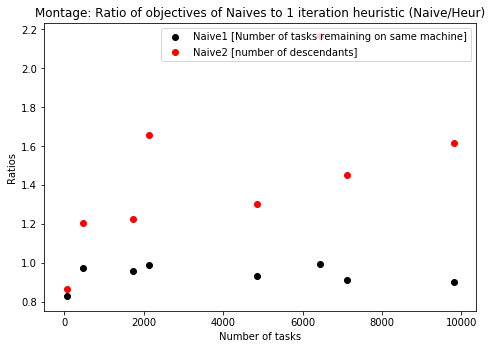

In [3]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive1 [Number of tasks remaining on same machine]', color='k')
plt.scatter(x, ratios2, label='Naive2 [number of descendants]', color='r')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.title("Montage: Ratio of objectives of Naives to 1 iteration heuristic (Naive/Heur)")
plt.legend()
plt.show()

In [10]:
import csv
with open("montage_both_naives_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "naive1", "heuristic", "upperbound"])
    writer.writerows(zip(x,  naives1, naives2, heur,  ubs))